<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**TÓPICOS EN APRENDIZAJE DE MÁQUINAS** <br>

__Objetivo__: Introdución a la implementación e interpretación de árboles de clasificación.

In [3]:
pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 217.9 kB/s eta 0:00:01
     ------------------------------------ - 51.2/52.8 kB 375.8 kB/s eta 0:00:01
     ------------------------------------ - 51.2/52.8 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 227.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     ------------------------------ -------- 92.2/116.4 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 2.8 MB/s eta 0:00:03
   - -------------------------------------- 0.2/8.1 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.2/8.1 MB 1.8 MB/s eta 0:00:05
   - 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos

In [5]:
# Cargamos la base de datos del titanic
ruta = r"C:\Users\Usuario\Documents\UNIANDES\Semestre 4\Aprendizaje de máquinas\complementarias\clase 4\titanic.csv"

titanic = pd.read_csv(ruta)

In [6]:
# Cambiamos los nombres de las columnas a minusculas
titanic.columns = titanic.columns.str.lower()

In [7]:
titanic

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploraci'on de la base

In [9]:
# Visualizamos las 5 primeras filas
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Visualizamos las 5 últimas filas
titanic.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic.shape

(891, 12)

### Diccionario de la base

| Variable    | Definición                       | Valores únicos                                                      | 
| :---------: | :-------:                        | :-------:                                                           |
| passengerid | Identificador único del pasajero |                                                                     |
| survived	  | ¿Sobrevivió el pasajero?         | 0 = No, 1 = Sí                                                      |
| pclass      | Clase del tiquete                | 1 = 1st (Precio alto), 2 = 2nd (Precio medio), 3 = 3rd (Precio bajo)|
| name        | Nombre del pasajero              |                                                                     |
| sex         | Sexo del pasajero                | male, female                                                        |
| age         | Edad del pasajero                |                                                                     |
| sibsp       | # de hermanos o cónyuges a bordo |                                                                     |
| parch       | # de padres o hijos a bordo      |                                                                     |
| ticket      | Número del tiquete               |                                                                     |
| fare        | Tarifa pagada                    |                                                                     |
| cabin       | Número de cabina                 |                                                                     |
| embarked    | Puerto por el que embarcó        | C = Cherbourg, Q = Queenstown, S = Southampton                      |

In [11]:
# No tenemos personas repetidas, vamos a eliminar las variables que no serán utiles para predecir como los ID:
titanic.drop(columns=["passengerid", "name", "ticket"], inplace=True)

In [12]:
for x in titanic:
    print(x,": ",titanic[x].unique())

survived :  [0 1]
pclass :  [3 1 2]
sex :  ['male' 'female']
age :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp :  [1 0 3 4 2 5 8]
parch :  [0 1 2 5 3 4 6]
fare :  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792

In [13]:
# Analizamos los tipos de las variables
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [14]:
titanic.isna().sum(axis=0) / titanic.shape[0]

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64

In [15]:
# Ahora vamos a ver cuántos missing values tenemos por variable
print(100 * titanic.isna().sum(axis = 0) / titanic.shape[0])

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
cabin       77.104377
embarked     0.224467
dtype: float64


In [16]:
# Nos falta alrededor del 77% de las entradas de la variable Cabina, casi el 20% de la variable edad y menos del 1% de los que embarcaron.
# La cabina tiene demasiados missing values por lo tanto debemos eliminar esta variable´
titanic.drop(columns=["cabin"], inplace=True)

<Axes: ylabel='count'>

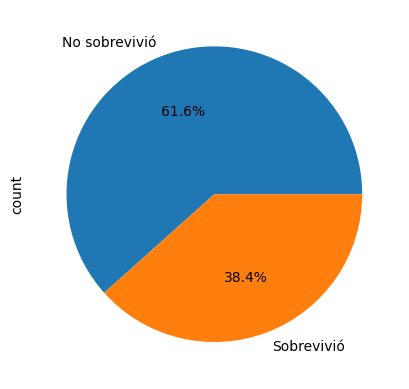

In [17]:
# Estudiamos la distribución de la variable a predecir
titanic.survived.value_counts().rename({0: 'No sobrevivió', 1: 'Sobrevivió'}).plot.pie(autopct = "%.1f%%")
# .rename({0: "No sobrevivió", 1: "Sobrevivió"}).plot.pie(autopct = "%.1f%%")

In [18]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
# Tenemos que volver dummies algunos datos
titanic_dummies = pd.get_dummies(titanic, columns=["pclass", "sex", "embarked"])

In [20]:
titanic.shape

(891, 8)

In [21]:
titanic_dummies.shape

(891, 13)

In [22]:
titanic_dummies

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,False,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,True,False,False,False,True
888,0,NaN,1,2,23.4500,False,False,True,True,False,False,False,True
889,1,26.0,0,0,30.0000,True,False,False,False,True,True,False,False


## Muestra de entrenamiento y evaluación.

In [24]:
pip install scikit-learn

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 650.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.6/8.0 MB 13.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 24.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 26.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.1/8.0 MB 29.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 33.4 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.0 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 28.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/309.1 kB ? eta -:--:--
   -------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test

In [26]:
# Divide el dataset del Titanic en datos de entrenamiento y datos de prueba
x_train, x_test, y_train, y_test = train_test_split(titanic_dummies.drop(columns=["survived"]), titanic_dummies.survived, test_size=0.3, 
    random_state=123, stratify=titanic_dummies.survived)

# Preprocesamiento

In [27]:
# Age y embarked los queremos llenar con algo para que el modelo no falle
mean_age = x_train.age.mean()
print(mean_age)

x_train['age'] = x_train.age.fillna(mean_age)
x_test['age'] = x_test.age.fillna(mean_age)

28.941457085828343


In [28]:
titanic.loc[x_train.index, 'embarked'].mode().values[0]

'S'

In [29]:
titanic[titanic.embarked.isna()].index

Index([61, 829], dtype='int64')

In [30]:
titanic.loc[x_train.index, 'embarked'].mode().values[0]

'S'

In [31]:
embarked_mode = titanic.loc[x_train.index, 'embarked'].mode().values[0]
print(embarked_mode)
embarked_nan_index = titanic[titanic.embarked.isna()].index
print(embarked_nan_index)

S
Index([61, 829], dtype='int64')


In [32]:
titanic.embarked.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embarked, Length: 891, dtype: bool

In [33]:
titanic[titanic.embarked.isna()].index

Index([61, 829], dtype='int64')

In [34]:
f'embarked_{embarked_mode}'

'embarked_S'

In [35]:
x_train.loc[x_train.index.isin(embarked_nan_index), f'embarked_{embarked_mode}'] = 1
x_test.loc[x_test.index.isin(embarked_nan_index), f'embarked_{embarked_mode}'] = 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3136\1155194747.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x_train.loc[x_train.index.isin(embarked_nan_index), f'embarked_{embarked_mode}'] = 1
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3136\1155194747.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x_test.loc[x_test.index.isin(embarked_nan_index), f'embarked_{embarked_mode}'] = 1


# Modelo de clasificación

In [36]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [37]:
clf = DecisionTreeClassifier(min_samples_leaf=100, random_state=0)
clf.fit(x_train, y_train);

## Evaluación de modelo

In [38]:
from sklearn import metrics

In [39]:
y_hat = clf.predict(x_test)

In [40]:
metrics.accuracy_score(y_test, y_hat)

0.7611940298507462

In [41]:
metrics.confusion_matrix(y_test,y_hat)

array([[138,  27],
       [ 37,  66]])

In [42]:
y_hat

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

In [43]:
clf.predict_proba(x_test)

array([[0.91764706, 0.08235294],
       [0.0661157 , 0.9338843 ],
       [0.68518519, 0.31481481],
       [0.91764706, 0.08235294],
       [0.68518519, 0.31481481],
       [0.46      , 0.54      ],
       [0.68518519, 0.31481481],
       [0.91764706, 0.08235294],
       [0.0661157 , 0.9338843 ],
       [0.68518519, 0.31481481],
       [0.46      , 0.54      ],
       [0.0661157 , 0.9338843 ],
       [0.0661157 , 0.9338843 ],
       [0.68518519, 0.31481481],
       [0.46      , 0.54      ],
       [0.0661157 , 0.9338843 ],
       [0.68518519, 0.31481481],
       [0.91764706, 0.08235294],
       [0.91764706, 0.08235294],
       [0.0661157 , 0.9338843 ],
       [0.80645161, 0.19354839],
       [0.91764706, 0.08235294],
       [0.91764706, 0.08235294],
       [0.91764706, 0.08235294],
       [0.0661157 , 0.9338843 ],
       [0.91764706, 0.08235294],
       [0.91764706, 0.08235294],
       [0.46      , 0.54      ],
       [0.46      , 0.54      ],
       [0.91764706, 0.08235294],
       [0.

{0: 'age', 1: 'sibsp', 2: 'parch', 3: 'fare', 4: 'pclass_1', 5: 'pclass_2', 6: 'pclass_3', 7: 'sex_female', 8: 'sex_male', 9: 'embarked_C', 10: 'embarked_Q', 11: 'embarked_S'}
Feature ranking:
1. feature 7 (0.796641)
2. feature 6 (0.142753)
3. feature 3 (0.045707)
4. feature 0 (0.014899)
5. feature 8 (0.000000)
6. feature 9 (0.000000)
7. feature 10 (0.000000)
8. feature 11 (0.000000)
9. feature 4 (0.000000)
10. feature 5 (0.000000)
11. feature 2 (0.000000)
12. feature 1 (0.000000)


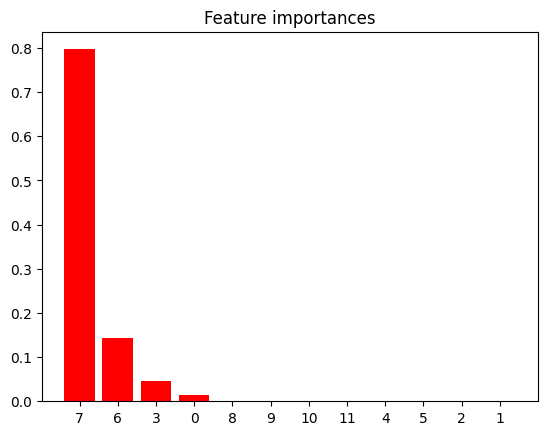

In [44]:
import matplotlib.pyplot as plt
# Importancia de caracterisiticas

print(dict(enumerate(x_train.columns)))
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.show()


# Tunning de hiperparametros

## Random Forest y Cross validation

<center> 
<img src = "https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" width = "600"/>
</center>

<center> 
<img src = "https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured.png" width = "600"/>
</center>

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=100, random_state=123)
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",100
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [47]:
y_hat_rf = clf.predict(x_test)

In [48]:
report_rf = metrics.classification_report(y_test, y_hat_rf)

In [49]:
print(report_rf)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.71      0.64      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [50]:
from sklearn.model_selection import GridSearchCV


In [51]:
## Corss-Validation

search_space_rf = [{
    'n_estimators': [20, 50],
    # max_depth': [5, 8, 15, 25, 30],
    # min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [50, 100] 
}]

clf = GridSearchCV(RandomForestClassifier(random_state=123), search_space_rf, scoring="f1", cv=2
                   , verbose=4)
clf.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END min_samples_leaf=50, n_estimators=20;, score=0.660 total time=   0.0s
[CV 2/2] END min_samples_leaf=50, n_estimators=20;, score=0.714 total time=   0.0s
[CV 1/2] END min_samples_leaf=50, n_estimators=50;, score=0.657 total time=   0.0s
[CV 2/2] END min_samples_leaf=50, n_estimators=50;, score=0.709 total time=   0.0s
[CV 1/2] END min_samples_leaf=100, n_estimators=20;, score=0.000 total time=   0.0s
[CV 2/2] END min_samples_leaf=100, n_estimators=20;, score=0.000 total time=   0.0s
[CV 1/2] END min_samples_leaf=100, n_estimators=50;, score=0.000 total time=   0.0s
[CV 2/2] END min_samples_leaf=100, n_estimators=50;, score=0.000 total time=   0.0s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...dom_state=123)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'min_samples_leaf': [50, 100], 'n_estimators': [20, 50]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",2
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [52]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081876,0.031836,0.015915,0.000728,50,20,"{'min_samples_leaf': 50, 'n_estimators': 20}",0.660000,0.713656,0.686828,0.026828,1
1,0.093226,0.021994,0.013794,0.001829,50,50,"{'min_samples_leaf': 50, 'n_estimators': 50}",0.656716,0.709402,0.683059,0.026343,2
2,0.035369,0.004092,0.000000,0.000000,100,20,"{'min_samples_leaf': 100, 'n_estimators': 20}",0.000000,0.000000,0.000000,0.000000,3
3,0.090981,0.001566,0.009304,0.009304,100,50,"{'min_samples_leaf': 100, 'n_estimators': 50}",0.000000,0.000000,0.000000,0.000000,3


In [53]:
y_hat = clf.best_estimator_.predict(x_test)

In [54]:
titanic[["survived", "pclass", "sex", "embarked"]] = titanic[["survived", "pclass", "sex", "embarked"]].astype('category')


## Dividir la muestra en train y test
- Dividir la base es sumamente importante para poder garantizar la correcta evaluación del modelo. 
- La idea es crear una receta de preprocesamiento sobre la base de entrenamiento. Test se debe quedar quietesito y sin molestar a un lado.
- Por preprocesamiento entendemos: imputar missing values, transformar las variables categóricas y estandarizar las variables numéricas.
- Luego de tener nuestra base de train lista para la acción, vamos a probar diferentes modelos en ella. 
- Como los modelos tienen varios parametros que se deben escoger, vamos a utilizar la técnica de Cross-Validation para encontrar los mejores parámetros.
- Una vez tengamos entrenados a nuestros modelos y escogidos los mejores parametros, vamos a pasar a jugar con test.
- En test se debe aplicar exactamente la misma receta que se usó en Train para preprocesar. Por ejemplo, se deben usar los parametros con los que se escaló train para escalar train. No volvemos a calcular estos parametros en test!
- Para cada modelo producimos unas predicciones en test y las evaluamos con alguna métrica. Con base en esto escogemos el mejor modelo.

In [55]:
x_train, x_test, y_trian, y_test =  train_test_split(
    titanic.drop(columns=['survived']),
    titanic.survived,
    test_size=.3,
    random_state=864
)

In [56]:
print(x_train.select_dtypes(include=np.number).columns.to_list())
x_train.select_dtypes(include=np.number)

['age', 'sibsp', 'parch', 'fare']


,age,sibsp,parch,fare
856,45.0,1,1,164.8667
255,29.0,0,2,15.2458
880,25.0,0,1,26.0000
79,30.0,0,0,12.4750
28,NaN,0,0,7.8792
...,...,...,...,...
565,24.0,2,0,24.1500
693,25.0,0,0,7.2250
90,29.0,0,0,8.0500
393,23.0,1,0,113.2750


In [57]:
titanic.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [58]:
# Paso 1. Estandarizar

from sklearn.preprocessing import StandardScaler

numeric_features = x_train.select_dtypes(include=np.number).columns.to_list()

numeric_scaler = ('scaler', StandardScaler())

In [59]:
ex_scaler = StandardScaler()
train_ex_scaled = ex_scaler.fit_transform(x_train[numeric_features])

print(ex_scaler.mean_)
print(ex_scaler.var_)

test_ex_scaled = ex_scaler.transform(x_test[numeric_features][:10])

[29.37610101  0.52487961  0.36918138 30.47643708]
[2.25421406e+02 1.32161214e+00 5.69965140e-01 1.90869050e+03]


In [60]:
x_test[numeric_features][:10]

,age,sibsp,parch,fare
834,18.0,0,0,8.3000
861,21.0,1,0,11.5000
578,NaN,1,0,14.4583
143,19.0,0,0,6.7500
432,42.0,1,0,26.0000
775,18.0,0,0,7.7500
680,NaN,0,0,8.1375
375,NaN,1,0,82.1708
247,24.0,0,2,14.5000
220,16.0,0,0,8.0500


In [61]:
test_ex_scaled[:10]

array([[-0.75769751, -0.45657034, -0.48900764, -0.50760281],
       [-0.55788454,  0.41328691, -0.48900764, -0.43435709],
       [        nan,  0.41328691, -0.48900764, -0.36664372],
       [-0.69109319, -0.45657034, -0.48900764, -0.5430812 ],
       [ 0.84080626,  0.41328691, -0.48900764, -0.10246245],
       [-0.75769751, -0.45657034, -0.48900764, -0.52019192],
       [        nan, -0.45657034, -0.48900764, -0.51132232],
       [        nan,  0.41328691, -0.48900764,  1.18324705],
       [-0.35807157, -0.45657034,  2.16013809, -0.36568924],
       [-0.89090616, -0.45657034, -0.48900764, -0.51332513]])

In [62]:
# Paso 2. Imputar datos. KNN

from sklearn.impute import KNNImputer

numeric_imputer = ('knn_imputer', KNNImputer(n_neighbors=20))

In [63]:
ex_knn_imputer = KNNImputer(n_neighbors=20)
ex_knn_imputer.fit(train_ex_scaled)

ex_knn_imputer.transform(test_ex_scaled)

array([[-0.75769751, -0.45657034, -0.48900764, -0.50760281],
       [-0.55788454,  0.41328691, -0.48900764, -0.43435709],
       [-0.30978344,  0.41328691, -0.48900764, -0.36664372],
       [-0.69109319, -0.45657034, -0.48900764, -0.5430812 ],
       [ 0.84080626,  0.41328691, -0.48900764, -0.10246245],
       [-0.75769751, -0.45657034, -0.48900764, -0.52019192],
       [-0.01006398, -0.45657034, -0.48900764, -0.51132232],
       [ 0.63100264,  0.41328691, -0.48900764,  1.18324705],
       [-0.35807157, -0.45657034,  2.16013809, -0.36568924],
       [-0.89090616, -0.45657034, -0.48900764, -0.51332513]])

In [64]:
from sklearn.pipeline import Pipeline

# Reunimos el paso 1 y el paso 2
numeric_transformer = Pipeline(steps=[numeric_scaler, numeric_imputer])

In [65]:
# Paso 3. Imputar variables categoricas

from sklearn.impute import SimpleImputer

categrocal_features = x_train.select_dtypes(include='category').columns.to_list()
print(categrocal_features)

categrocal_imputer =  ('mode_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))

['pclass', 'sex', 'embarked']


In [66]:
# Paso 4. Dummyficar las variables categoricas

from sklearn.preprocessing import OneHotEncoder

categrocal_dummy = ('dummyficar', OneHotEncoder())

In [67]:
categorical_transformer = Pipeline(steps=[categrocal_imputer, categrocal_dummy])

In [68]:
# Ponemos todo junto
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categrocal_features)
    ]
)

In [69]:
# Define la función para entrenar y ajustar un modelo usando validación cruzada
def model_cv(x, y, preprocessor, classifier, search_space):
    pipeline = Pipeline(
        steps=[
            ('preprocesser', preprocessor),
            ('classifier', classifier)
        ]
    )

    clf = GridSearchCV(pipeline, search_space, scoring='accuracy', cv=3, verbose=4, n_jobs=-1)
    clf.fit(x, y)

    return clf

In [70]:
# Define hiperparámetros
search_space = [
    {
         'classifier__n_estimators': [100, 300, 500, 800, 1200],
        # 'classifier__max_depth': [5, 8, 15, 25, 30],
        # 'classifier__min_samples_split': [2, 5, 10, 15, 100],
        'classifier__min_samples_leaf': [1, 2, 5, 10] 
    }
]

In [71]:
# Entrena y selecciona automáticamente el mejor Random Forest
rf = model_cv(
    x=x_train,
    y=y_trian,
    preprocessor=preprocessor,
    classifier=RandomForestClassifier(random_state=123),
    search_space=search_space
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [72]:
rf.best_estimator_

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocesser', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('categorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differen

In [73]:
print("El Accuracy dentro de muestra con CV es " + str(round(rf.best_score_, 4)))


El Accuracy dentro de muestra con CV es 0.8122


In [ ]:
# Ver resultados
pd.DataFrame(rf.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_leaf,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,1.554302,0.009306,0.119076,0.003199,2,500,"{'classifier__min_samples_leaf': 2, 'classifie...",0.850962,0.802885,0.782609,0.812152,0.028664,1
9,3.639269,0.007117,0.255178,0.009607,2,1200,"{'classifier__min_samples_leaf': 2, 'classifie...",0.850962,0.802885,0.782609,0.812152,0.028664,1
6,0.932923,0.018690,0.077466,0.008236,2,300,"{'classifier__min_samples_leaf': 2, 'classifie...",0.850962,0.802885,0.777778,0.810541,0.030364,3
5,0.339205,0.001920,0.035697,0.004168,2,100,"{'classifier__min_samples_leaf': 2, 'classifie...",0.850962,0.802885,0.777778,0.810541,0.030364,3
8,2.440481,0.032305,0.178836,0.008717,2,800,"{'classifier__min_samples_leaf': 2, 'classifie...",0.850962,0.802885,0.777778,0.810541,0.030364,3
